# ИР-2: Дифференцирование

## Лабораторная работа по численным методам

Бирин Вячеслав, M3137, 505019

**Содержание:**
1. Задание 1: Метод дихотомии для поиска минимума унимодальных функций
2. Задание 2: Численное дифференцирование с использованием разностных схем

Source: https://github.com/Vyacheslav1557/calculus-lab2


In [791]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = (12, 6)
rcParams['font.size'] = 10
rcParams['axes.grid'] = True
rcParams['grid.alpha'] = 0.3
plt.style.use('seaborn-v0_8-darkgrid')
from IPython.display import display


---
# Задание 1: Метод дихотомии для поиска минимума

## Аналитичесий этап

### 1. Выбор функции

$$f(x) = (x-3)^2 \cdot e^{-0.3x} + 0.2x$$

In [792]:
def f(x):
    return (x - 3)**2 * np.exp(-0.3 * x) + 0.2 * x


### 2. Визуализация функции и определение интервала унимодальности

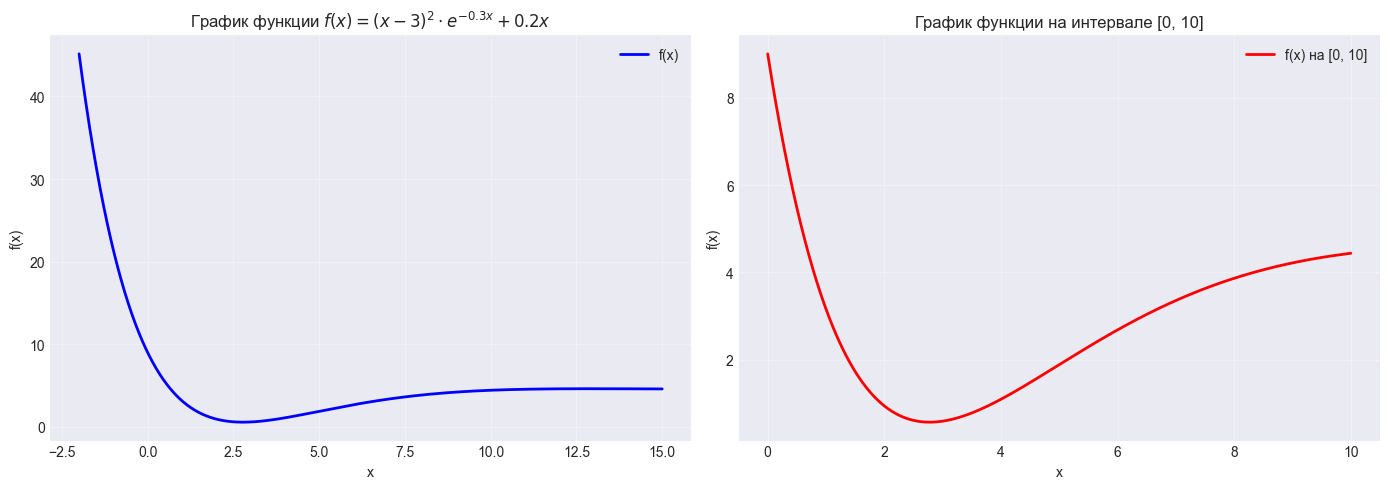

In [793]:
x_plot = np.linspace(-2, 15, 1000)
y_plot = f(x_plot)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции $f(x) = (x-3)^2 \\cdot e^{-0.3x} + 0.2x$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
x_zoom = np.linspace(0, 10, 1000)
y_zoom = f(x_zoom)
plt.plot(x_zoom, y_zoom, 'r-', linewidth=2, label='f(x) на [0, 10]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции на интервале [0, 10]')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 3. Анализ унимодальности

- На интервале [0, 10] функция непрерывна
- Визуально наблюдается один миниммум
- Функция строго убывает до точки минимума затем строго возрастает
- Следовательно функция унимодальна на [0, 10]

### 4. Теоретический анализ (метод дихотомии)

**Сходимость:**
- Метод сходится для унимодальных функций
- Длина интервала сокращается примерно вдвое на каждой итерации
- Количество итераций: $n \approx \log_2\left(\frac{b_0 - a_0}{\varepsilon}\right)$

In [794]:
def theoretical_iterations(a, b, epsilon):
    return int(np.ceil(np.log2((b - a) / epsilon)))
a0, b0 = 0, 10
eps_values = [0.1, 0.01, 0.001]
for eps in eps_values:
    n_iter = theoretical_iterations(a0, b0, eps)
    print(f"eps = {eps:6.3f}  => {n_iter} итераций (примерно)")


eps =  0.100  => 7 итераций (примерно)
eps =  0.010  => 10 итераций (примерно)
eps =  0.001  => 14 итераций (примерно)


## Практический  этап

### 1. Реализация  метода дихотомии

In [795]:
def dichotomy_method(f, a, b, epsilon, delta=None):
    if delta is None:
        delta = epsilon / 2
    history = {
        'a': [a],
        'b': [b],
        'y': [],
        'z': [],
        'f_y': [],
        'f_z': [],
        'interval_length': [b - a],
        'x_mid': [(a + b) / 2]
    }
    k = 0
    while True:
        y_k = (a + b - delta) / 2
        z_k = (a + b + delta) / 2
        f_y = f(y_k)
        f_z = f(z_k)
        history['y'].append(y_k)
        history['z'].append(z_k)
        history['f_y'].append(f_y)
        history['f_z'].append(f_z)
        if f_y <= f_z:
            b = z_k
        else:
            a = y_k
        history['a'].append(a)
        history['b'].append(b)
        history['interval_length'].append(b - a)
        history['x_mid'].append((a + b) / 2)
        k += 1
        if b - a <= epsilon:
            break
    x_min = (a + b) / 2
    f_min = f(x_min)
    return {
        'x_min': x_min,
        'f_min': f_min,
        'iterations': k,
        'history': history,
        'final_interval': (a, b)
    }



### 2. Применение метода к выбраной функции

In [796]:
a0, b0 = 0, 10
epsilon = 0.01
result = dichotomy_method(f, a0, b0, epsilon)
print(f"Нач интервал: [{a0}, {b0}]")
print(f"Требуемая точность: eps = {epsilon}")
print(f"Колво итераций:  {result['iterations']}")
print(f"Теоретическое число: {theoretical_iterations(a0, b0, epsilon)}")
print(f"Найденный минимум: {result['x_min']:.6f}")
print(f"Значение функции:  {result['f_min']:.6f}")
print(f"Конечный интервал: [{result['final_interval'][0]:.6f}, {result['final_interval'][1]:.6f}]")
print(f"Длина конечного интервала:  {result['final_interval'][1] - result['final_interval'][0]:.6f}")


Нач интервал: [0, 10]
Требуемая точность: eps = 0.01
Колво итераций:  11
Теоретическое число: 10
Найденный минимум: 2.776991
Значение функции:  0.577017
Конечный интервал: [2.772051, 2.781931]
Длина конечного интервала:  0.009880


### 3. Визуализация работы метода

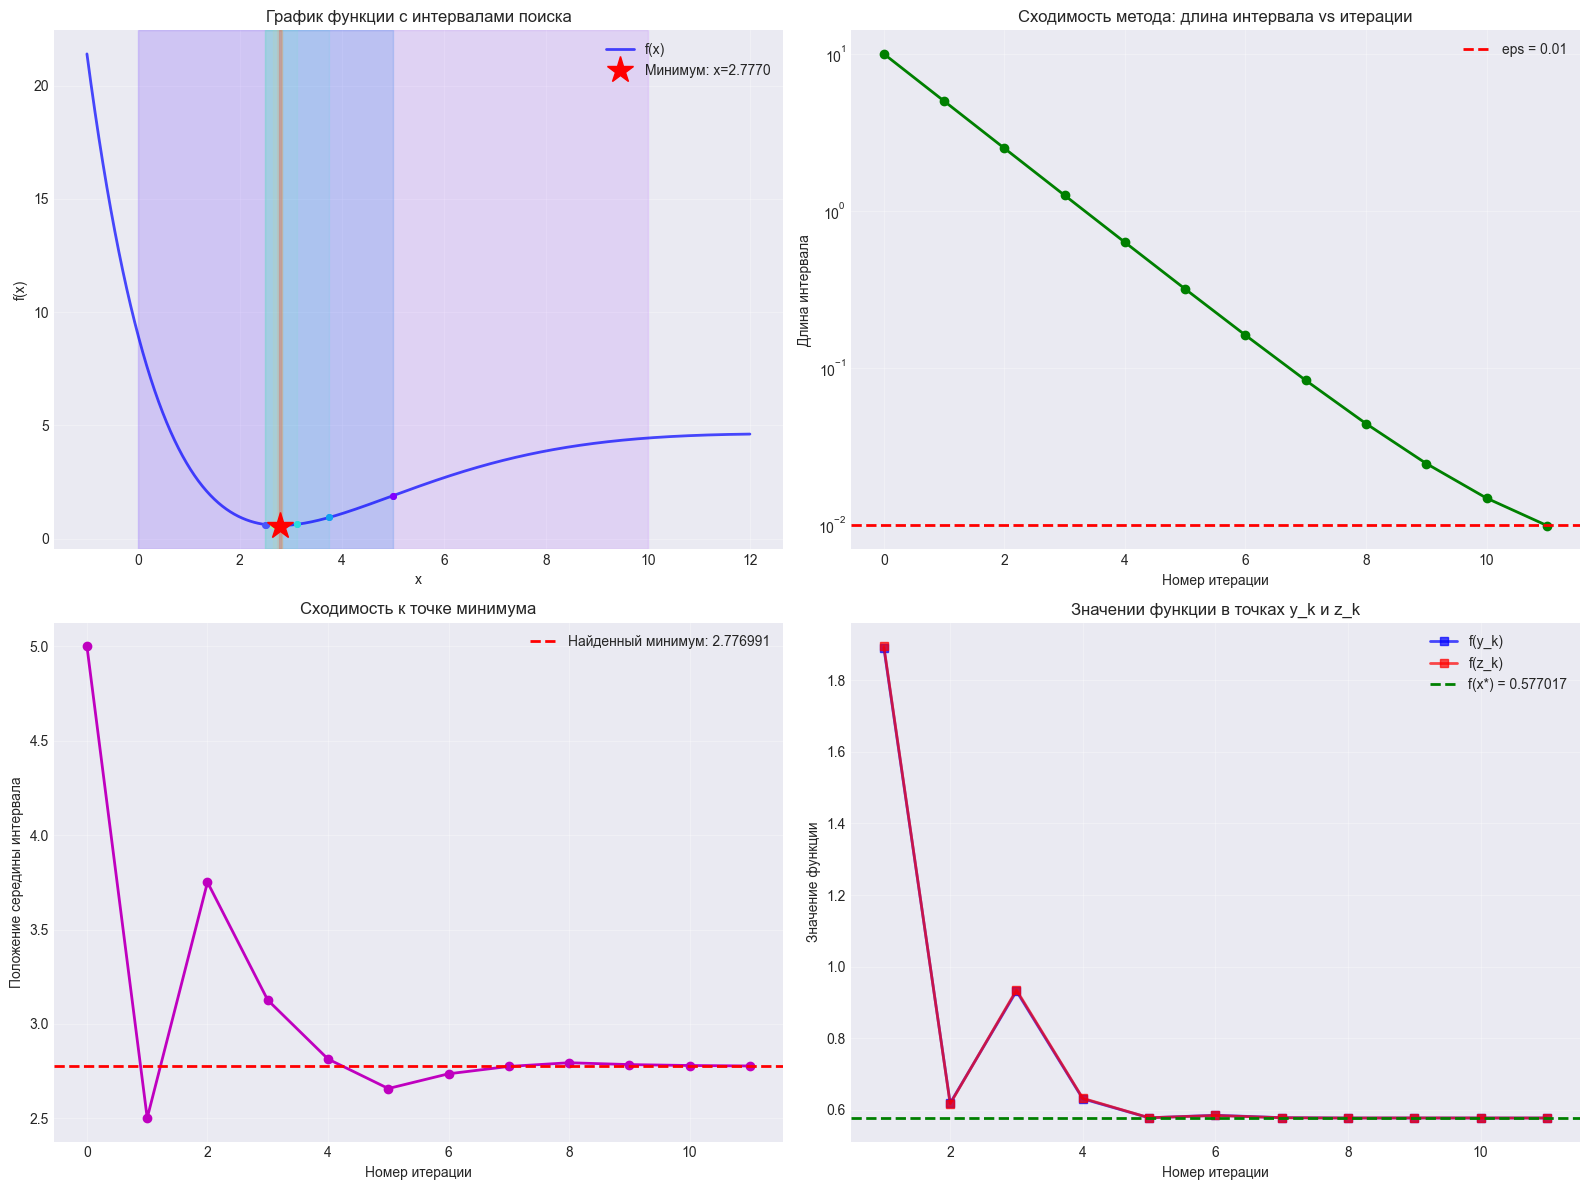

In [797]:
history = result['history']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
ax1 = axes[0, 0]
x_plot = np.linspace(-1, 12, 1000)
y_plot = f(x_plot)
ax1.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x)', alpha=0.7)
colors = plt.cm.rainbow(np.linspace(0, 1, min(10, result['iterations'])))
for i in range(min(10, result['iterations'])):
    a_i = history['a'][i]
    b_i = history['b'][i]
    y_i = history['y'][i]
    z_i = history['z'][i]
    ax1.axvspan(a_i, b_i, alpha=0.1, color=colors[i])
    ax1.plot([y_i, z_i], [f(y_i), f(z_i)], 'o', color=colors[i], markersize=4)
ax1.plot(result['x_min'], result['f_min'], 'r*', markersize=20,
         label=f"Минимум: x={result['x_min']:.4f}", zorder=10)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('График функции с интервалами поиска')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax2 = axes[0, 1]
iterations_arr = np.arange(len(history['interval_length']))
ax2.semilogy(iterations_arr, history['interval_length'], 'go-', linewidth=2, markersize=6)
ax2.axhline(y=epsilon, color='r', linestyle='--', linewidth=2, label=f'eps = {epsilon}')
ax2.set_xlabel('Номер итерации')
ax2.set_ylabel('Длина интервала')
ax2.set_title('Сходимость метода: длина интервала vs итерации')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax3 = axes[1, 0]
ax3.plot(iterations_arr, history['x_mid'], 'mo-', linewidth=2, markersize=6)
ax3.axhline(y=result['x_min'], color='r', linestyle='--', linewidth=2,
           label=f'Найденный минимум: {result["x_min"]:.6f}')
ax3.set_xlabel('Номер итерации')
ax3.set_ylabel('Положение середины интервала')
ax3.set_title('Сходимость к точке минимума')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax4 = axes[1, 1]
iter_points = np.arange(1, len(history['f_y']) + 1)
ax4.plot(iter_points, history['f_y'], 'bs-', linewidth=2, markersize=6, label='f(y_k)', alpha=0.7)
ax4.plot(iter_points, history['f_z'], 'rs-', linewidth=2, markersize=6, label='f(z_k)', alpha=0.7)
ax4.axhline(y=result['f_min'], color='g', linestyle='--', linewidth=2,
           label=f'f(x*) = {result["f_min"]:.6f}')
ax4.set_xlabel('Номер итерации')
ax4.set_ylabel('Значение функции')
ax4.set_title('Значении функции в точках y_k и z_k')
ax4.legend()
ax4.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 4. Исследование сходимости при разных значениях точности

In [798]:
epsilon_values = [0.1, 0.01, 0.001, 0.0001]
results_comparison = []
print(f"eps| Теор. итер. | Факт. итер. | x_min | f(x_min) | Длина инт.")
print()
for eps in epsilon_values:
    res = dichotomy_method(f, a0, b0, eps)
    theor = theoretical_iterations(a0, b0, eps)
    interval_len = res['final_interval'][1] - res['final_interval'][0]
    results_comparison.append({
        'epsilon': eps,
        'theoretical': theor,
        'actual': res['iterations'],
        'x_min': res['x_min'],
        'f_min': res['f_min'],
        'interval_length': interval_len,
        'history': res['history']
    })
    print(f"{eps:^10.4f} | {theor:^12d} | {res['iterations']:^12d} | "
          f"{res['x_min']:^12.6f} | {res['f_min']:^12.6f} | {interval_len:^12.6f}")


eps| Теор. итер. | Факт. итер. | x_min | f(x_min) | Длина инт.

  0.1000   |      7       |      8       |   2.765137   |   0.577091   |   0.088867  
  0.0100   |      10      |      11      |   2.776991   |   0.577017   |   0.009880  
  0.0010   |      14      |      15      |   2.777363   |   0.577017   |   0.000805  
  0.0001   |      17      |      18      |   2.777359   |   0.577017   |   0.000088  


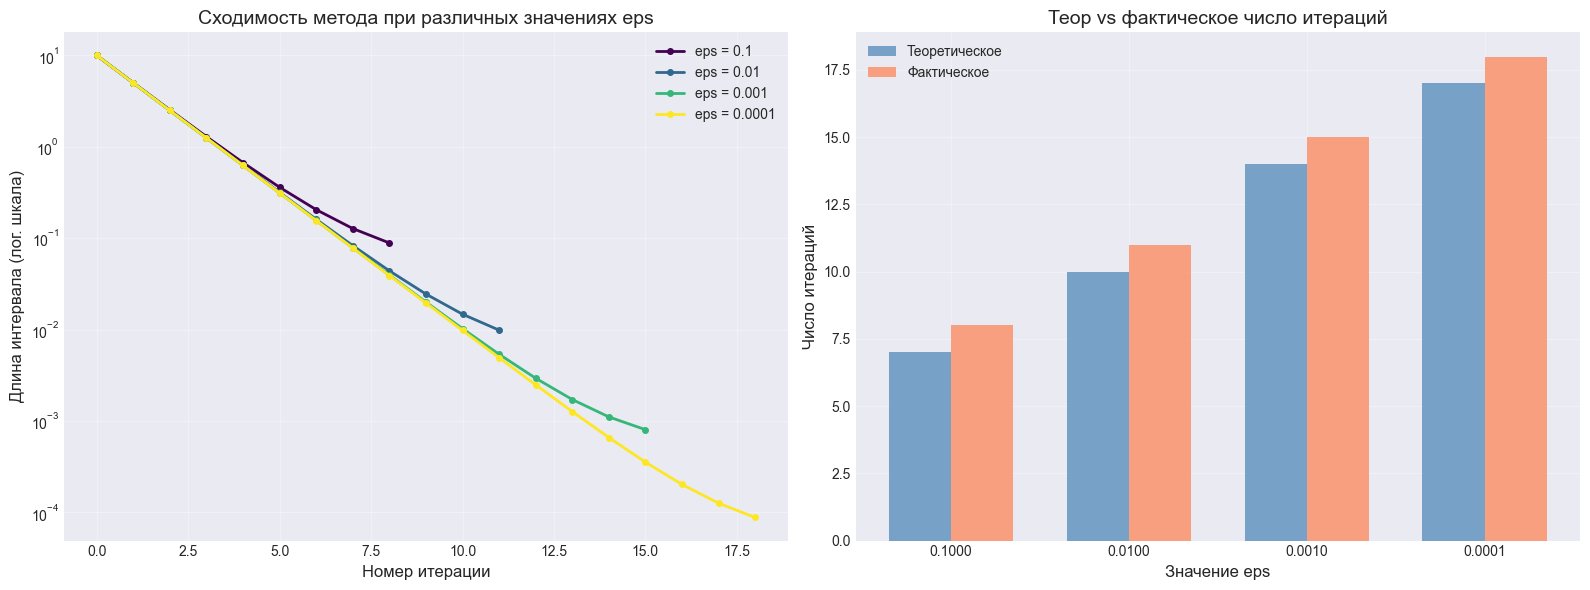

In [799]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax1 = axes[0]
colors = plt.cm.viridis(np.linspace(0, 1, len(epsilon_values)))
for i, comp in enumerate(results_comparison):
    iterations = np.arange(len(comp['history']['interval_length']))
    ax1.semilogy(iterations, comp['history']['interval_length'],
                'o-', color=colors[i], linewidth=2, markersize=4,
                label=f"eps = {comp['epsilon']}")
ax1.set_xlabel('Номер итерации', fontsize=12)
ax1.set_ylabel('Длина интервала (лог. шкала)', fontsize=12)
ax1.set_title('Сходимость метода при различных значениях eps', fontsize=14)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax2 = axes[1]
eps_labels = [f"{eps:.4f}" for eps in epsilon_values]
theoretical = [comp['theoretical'] for comp in results_comparison]
actual = [comp['actual'] for comp in results_comparison]
x_pos = np.arange(len(epsilon_values))
width = 0.35
ax2.bar(x_pos - width/2, theoretical, width, label='Теоретическое', alpha=0.7, color='steelblue')
ax2.bar(x_pos + width/2, actual, width, label='Фактическое', alpha=0.7, color='coral')
ax2.set_xlabel('Значение eps', fontsize=12)
ax2.set_ylabel('Число итераций', fontsize=12)
ax2.set_title('Теор vs фактическое число итераций', fontsize=14)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(eps_labels)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


### 5. Исследование на разных интервалах

In [800]:
test_intervals = [
    (0, 10, "Унимодальный интервал [0, 10]"),
    (1, 8, "Унимодальный интервал [1, 8]"),
    (0, 5, "Унимодальный интервал [0, 5]"),
    (-2, 12, "Расширенный интервал [-2, 12] (мог бы быть неунимодальным :D)")
]
epsilon_test = 0.01
print("Исследование метода на разных интервалах (eps = 0.01):")
interval_results = []
for a, b, description in test_intervals:
    res = dichotomy_method(f, a, b, epsilon_test)
    interval_results.append((a, b, description, res, True))
    print(f"\n{description}:")
    print(f"Интервал: [{a}, {b}]")
    print(f"Итераций: {res['iterations']}")
    print(f"x_min = {res['x_min']:.6f}, f(x_min) = {res['f_min']:.6f}")


Исследование метода на разных интервалах (eps = 0.01):

Унимодальный интервал [0, 10]:
Интервал: [0, 10]
Итераций: 11
x_min = 2.776991, f(x_min) = 0.577017

Унимодальный интервал [1, 8]:
Интервал: [1, 8]
Итераций: 11
x_min = 2.776866, f(x_min) = 0.577017

Унимодальный интервал [0, 5]:
Интервал: [0, 5]
Итераций: 10
x_min = 2.775603, f(x_min) = 0.577019

Расширенный интервал [-2, 12] (мог бы быть неунимодальным :D):
Интервал: [-2, 12]
Итераций: 12
x_min = 2.777405, f(x_min) = 0.577017


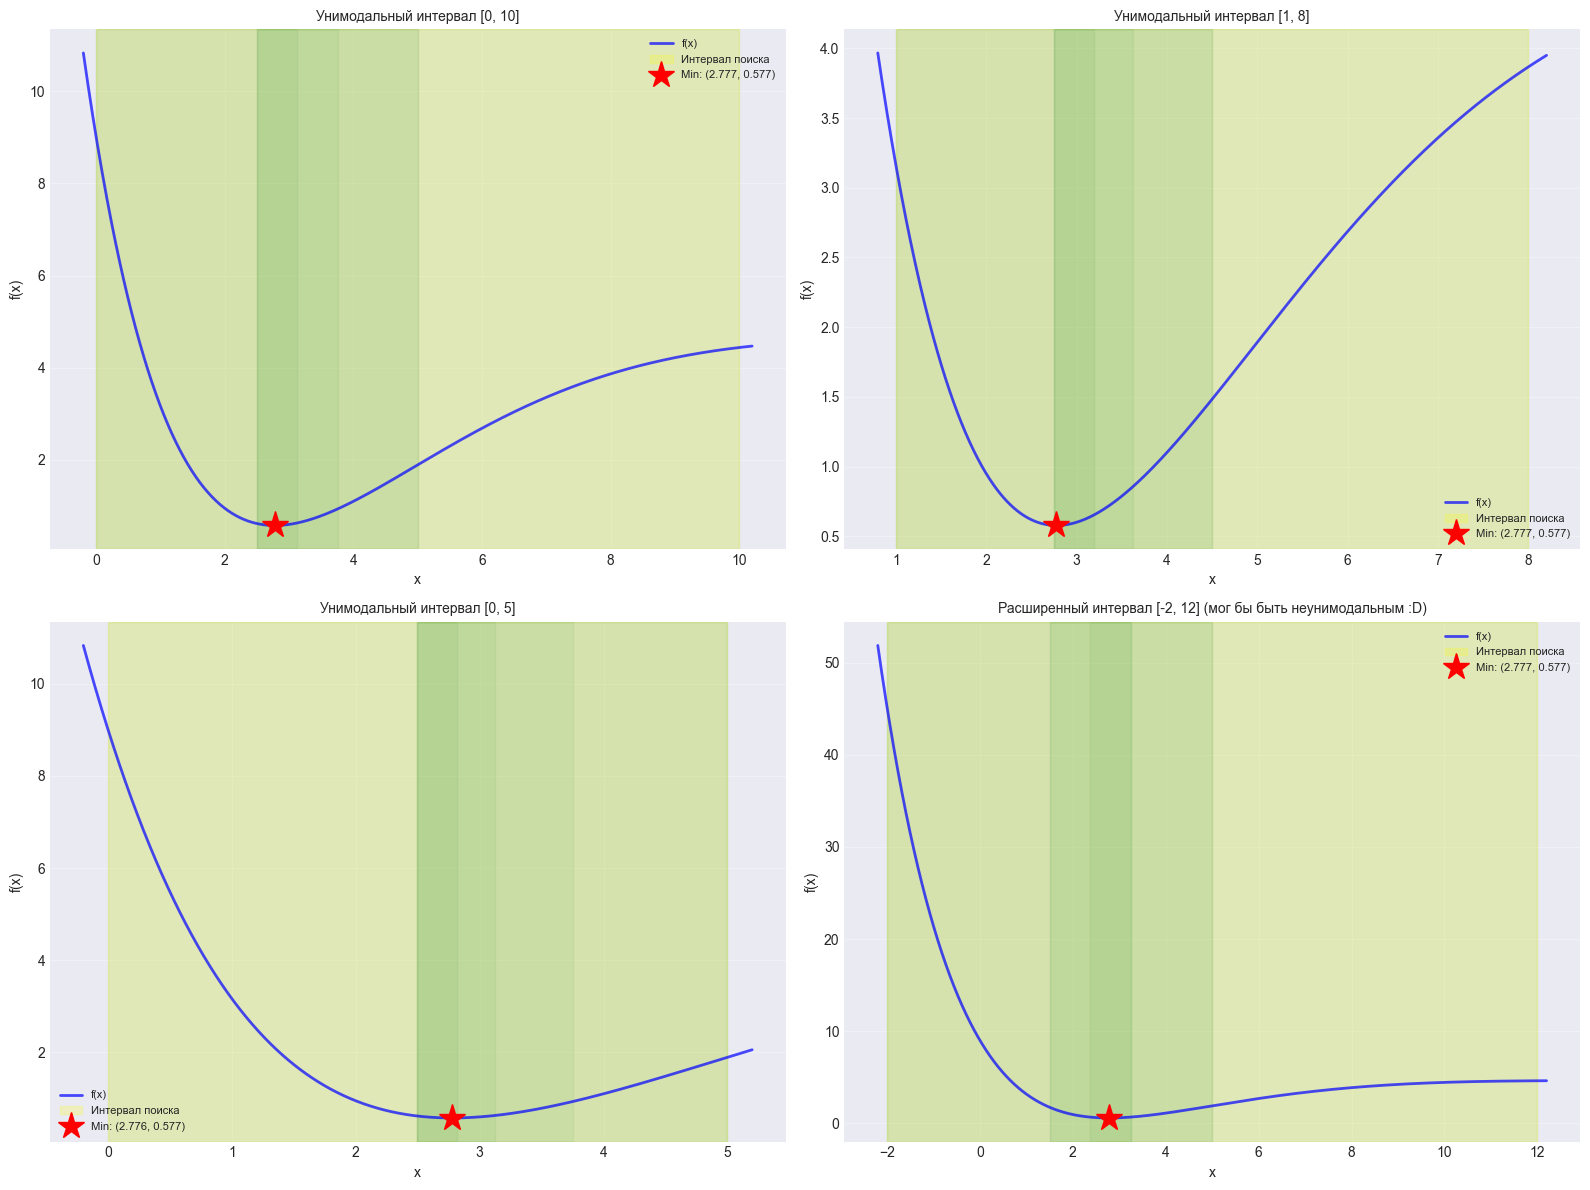

In [801]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
for idx, (a, b, description, res, success) in enumerate(interval_results):
    ax = axes[idx]
    x_range = np.linspace(a - 0.2, b + 0.2, 1000)
    y_range = f(x_range)
    ax.plot(x_range, y_range, 'b-', linewidth=2, alpha=0.7, label='f(x)')
    ax.axvspan(a, b, alpha=0.2, color='yellow', label='Интервал поиска')
    if success and res:
        ax.plot(res['x_min'], res['f_min'], 'r*', markersize=20,
               label=f"Min: ({res['x_min']:.3f}, {res['f_min']:.3f})")
        history = res['history']
        for i in range(min(5, res['iterations'])):
            a_i = history['a'][i]
            b_i = history['b'][i]
            ax.axvspan(a_i, b_i, alpha=0.05, color='green')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(description, fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Выводы по Заданию 1

**Основные результаты:**

1. **Функция и унимодальность:**
   - Исследумая функция $f(x) = (x-3)^2 \cdot e^{-0.3x} + 0.2x$ является унимодальной на интервале [0, 10]
   - На этом интервале существует единственный минимум

2. **Сходимость метода:**
   - Метод дихотомии успешно находит минимум для унимодальной функции
   - Фактическое число итераций близко к теоретическому значению $n \approx \log_2\left(\frac{b-a}{\varepsilon}\right)$\

3. **Точность:**
   - С уменьшением eps точность минимума увеличивается
   - Метод гарантированно находит решение с заданной точностью за конечное число шагов

4. **Устойчивость:**
   - Метод работает корректно на различных подинтервалах области определения
   - Важно выбирать интервал на котором функция унимодальна

---
# Задание 2: Численное дифференцирование

### 1. Выбор функций

Выберем две функции с известными аналитическими производными:

**Функция 1:**
$$f_1(x) = \sin(x) \cdot e^{-x}$$
$$f_1'(x) = e^{-x}(\cos(x) - \sin(x))$$

**Функция 2:**
$$f_2(x) = x^3 - 2x^2 + 3x - 1$$
$$f_2'(x) = 3x^2 - 4x + 3$$

In [802]:
def f1(x):
    return np.sin(x) * np.exp(-x)
def f1_derivative(x):
    return np.exp(-x) * (np.cos(x) - np.sin(x))
def f2(x):
    return x**3 - 2*x**2 + 3*x - 1
def f2_derivative(x):
    return 3*x**2 - 4*x + 3


## Практический  этап

### 1. Реализация методов численного дифференцирования

In [803]:
def right_difference_derivative(x, y, h):
    n = len(y)
    derivative = np.zeros(n)
    for i in range(n - 1):
        derivative[i] = (y[i + 1] - y[i]) / h
    derivative[n - 1] = (y[n - 1] - y[n - 2]) / h
    return derivative
def left_difference_derivative(x, y, h):
    n = len(y)
    derivative = np.zeros(n)
    derivative[0] = (y[1] - y[0]) / h
    for i in range(1, n):
        derivative[i] = (y[i] - y[i - 1]) / h
    return derivative
def central_difference_derivative(x, y, h):
    n = len(y)
    derivative = np.zeros(n)
    derivative[0] = (-3*y[0] + 4*y[1] - y[2]) / (2*h)
    for i in range(1, n - 1):
        derivative[i] = (y[i + 1] - y[i - 1]) / (2*h)
    derivative[n - 1] = (y[n - 3] - 4*y[n - 2] + 3*y[n - 1]) / (2*h)
    return derivative
def compute_grid_and_derivatives(func, func_derivative, a, b, h):
    x = np.arange(a, b + h/2, h)
    y = func(x)
    analytical = func_derivative(x)
    right_diff = right_difference_derivative(x, y, h)
    left_diff = left_difference_derivative(x, y, h)
    central_diff = central_difference_derivative(x, y, h)
    return {
        'x': x,
        'y': y,
        'analytical': analytical,
        'right_diff': right_diff,
        'left_diff': left_diff,
        'central_diff': central_diff
    }


### 2. Визуализация при фиксированом шаге h = 0.1

In [804]:
a, b = 0, 10
h = 0.1
data_f1 = compute_grid_and_derivatives(f1, f1_derivative, a, b, h)
data_f2 = compute_grid_and_derivatives(f2, f2_derivative, a, b, h)
print(f"h = {h}")
print(f"Количество узлов сетки: {len(data_f1['x'])}")


h = 0.1
Количество узлов сетки: 101


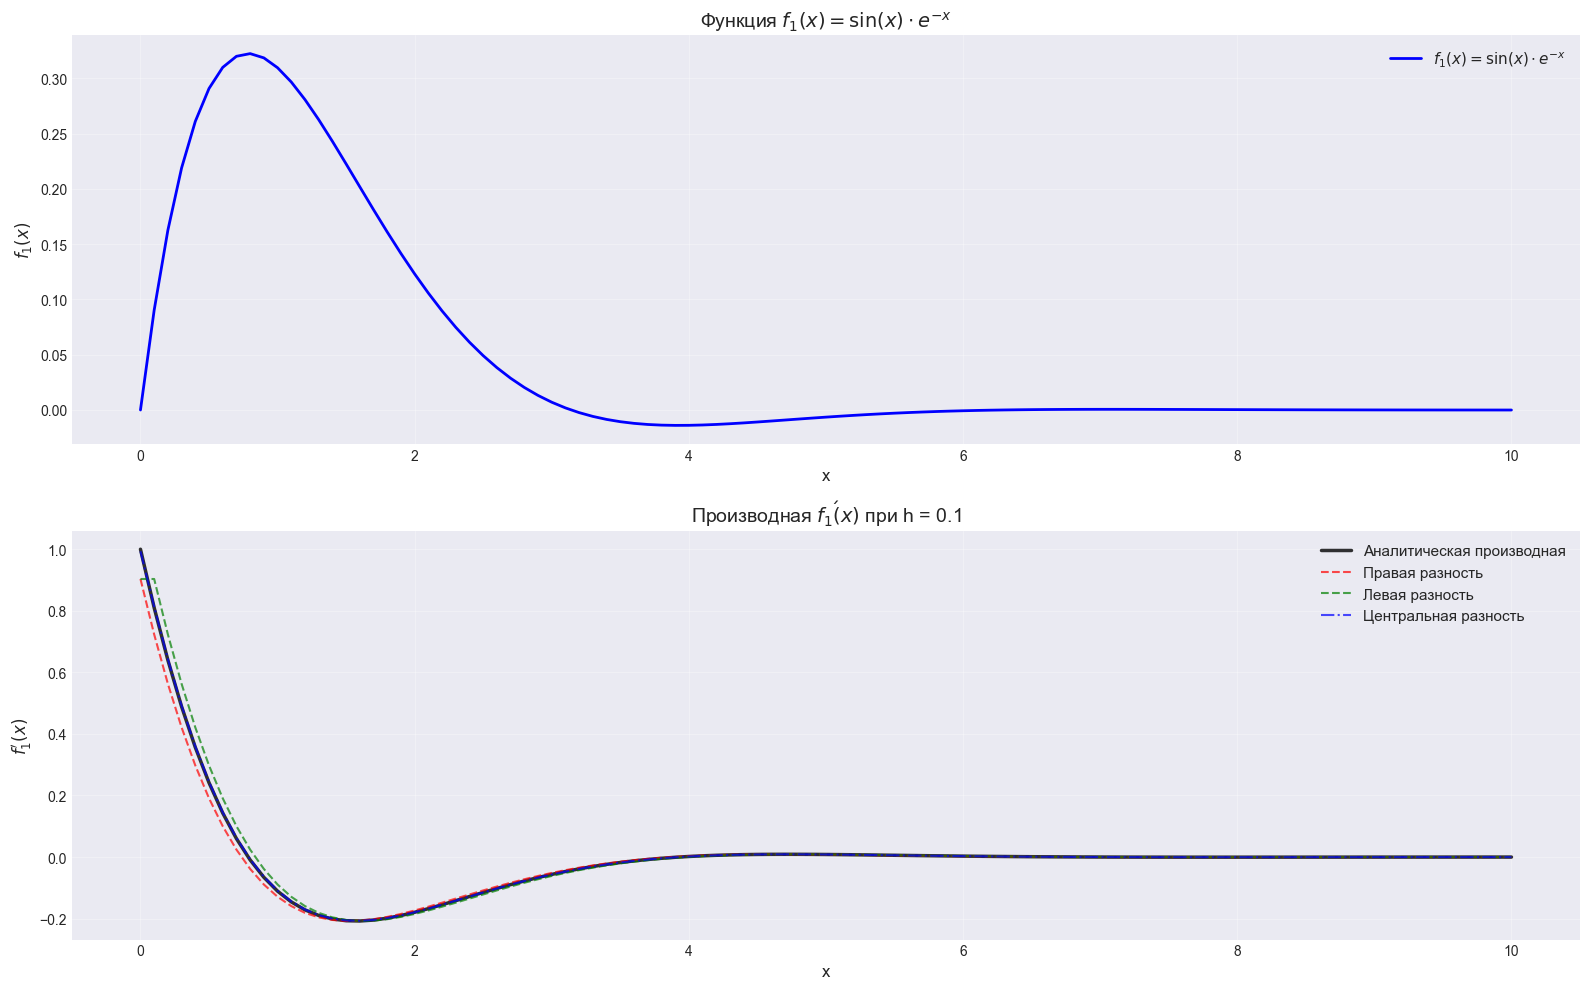

In [805]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
ax1 = axes[0]
ax1.plot(data_f1['x'], data_f1['y'], 'b-', linewidth=2, label='$f_1(x) = \\sin(x) \\cdot e^{-x}$')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('$f_1(x)$', fontsize=12)
ax1.set_title('Функция $f_1(x) = \\sin(x) \\cdot e^{-x}$', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax2 = axes[1]
ax2.plot(data_f1['x'], data_f1['analytical'], 'k-', linewidth=2.5,
        label='Аналитическая производная', alpha=0.8)
ax2.plot(data_f1['x'], data_f1['right_diff'], 'r--', linewidth=1.5,
        label='Правая разность', alpha=0.7)
ax2.plot(data_f1['x'], data_f1['left_diff'], 'g--', linewidth=1.5,
        label='Левая разность', alpha=0.7)
ax2.plot(data_f1['x'], data_f1['central_diff'], 'b-.', linewidth=1.5,
        label='Центральная разность', alpha=0.7)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel("$f_1'(x)$", fontsize=12)
ax2.set_title(f"Производная $f_1\\'(x)$ при h = {h}", fontsize=14)
ax2.legend(fontsize=11, loc='best')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


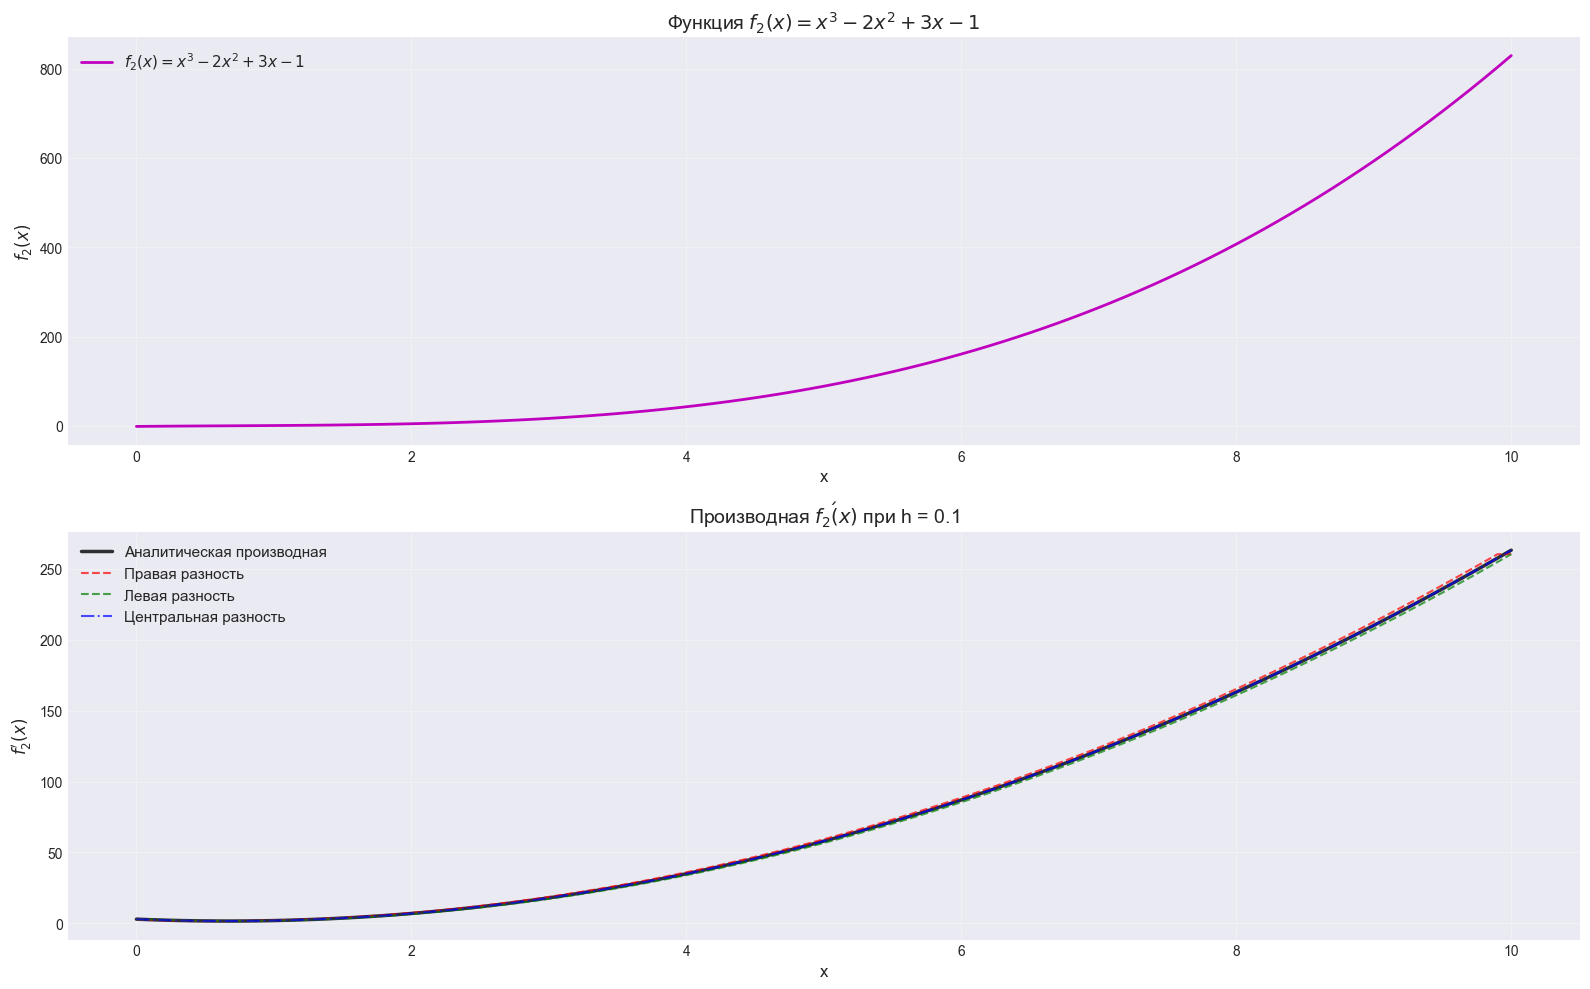

In [806]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
ax1 = axes[0]
ax1.plot(data_f2['x'], data_f2['y'], 'm-', linewidth=2, label='$f_2(x) = x^3 - 2x^2 + 3x - 1$')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('$f_2(x)$', fontsize=12)
ax1.set_title('Функция $f_2(x) = x^3 - 2x^2 + 3x - 1$', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax2 = axes[1]
ax2.plot(data_f2['x'], data_f2['analytical'], 'k-', linewidth=2.5,
        label='Аналитическая производная', alpha=0.8)
ax2.plot(data_f2['x'], data_f2['right_diff'], 'r--', linewidth=1.5,
        label='Правая разность', alpha=0.7)
ax2.plot(data_f2['x'], data_f2['left_diff'], 'g--', linewidth=1.5,
        label='Левая разность', alpha=0.7)
ax2.plot(data_f2['x'], data_f2['central_diff'], 'b-.', linewidth=1.5,
        label='Центральная разность', alpha=0.7)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel("$f_2'(x)$", fontsize=12)
ax2.set_title(f"Производная $f_2\\'(x)$ при h = {h}", fontsize=14)
ax2.legend(fontsize=11, loc='best')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 3. Вычисление среднеквадратичного отклонения (СКО) при h = 0.1

In [807]:
def calculate_mse(analytical, numerical):
    return np.sqrt(np.mean((analytical - numerical)**2))
mse_f1_right = calculate_mse(data_f1['analytical'], data_f1['right_diff'])
mse_f1_left = calculate_mse(data_f1['analytical'], data_f1['left_diff'])
mse_f1_central = calculate_mse(data_f1['analytical'], data_f1['central_diff'])
mse_f2_right = calculate_mse(data_f2['analytical'], data_f2['right_diff'])
mse_f2_left = calculate_mse(data_f2['analytical'], data_f2['left_diff'])
mse_f2_central = calculate_mse(data_f2['analytical'], data_f2['central_diff'])
print(f"Среднеквадратичное отклонение (СКО) при h = {h}:")
print()
print(f"Метод | f1(x) | f2(x)")
print()
print(f"Правая разность | {mse_f1_right:^15.6e} | {mse_f2_right:^15.6e}")
print(f"Левая разность | {mse_f1_left:^15.6e} | {mse_f2_left:^15.6e}")
print(f"Центральная разность | {mse_f1_central:^15.6e} | {mse_f2_central:^15.6e}")


Среднеквадратичное отклонение (СКО) при h = 0.1:

Метод | f1(x) | f2(x)

Правая разность |  1.968160e-02   |  1.574799e+00  
Левая разность |  2.114023e-02   |  1.558532e+00  
Центральная разность |  1.097253e-03   |  1.029274e-02  


### 4. Исследование зависимости СКО от величины шага

In [808]:
h_base = 0.1
step_factors = [1, 2, 4, 8, 16]
h_values = [h_base / factor for factor in step_factors]
results_f1 = {'h': [], 'right': [], 'left': [], 'central': []}
results_f2 = {'h': [], 'right': [], 'left': [], 'central': []}
for h in h_values:
    data_f1_temp = compute_grid_and_derivatives(f1, f1_derivative, a, b, h)
    mse_right_f1 = calculate_mse(data_f1_temp['analytical'], data_f1_temp['right_diff'])
    mse_left_f1 = calculate_mse(data_f1_temp['analytical'], data_f1_temp['left_diff'])
    mse_central_f1 = calculate_mse(data_f1_temp['analytical'], data_f1_temp['central_diff'])
    results_f1['h'].append(h)
    results_f1['right'].append(mse_right_f1)
    results_f1['left'].append(mse_left_f1)
    results_f1['central'].append(mse_central_f1)
    data_f2_temp = compute_grid_and_derivatives(f2, f2_derivative, a, b, h)
    mse_right_f2 = calculate_mse(data_f2_temp['analytical'], data_f2_temp['right_diff'])
    mse_left_f2 = calculate_mse(data_f2_temp['analytical'], data_f2_temp['left_diff'])
    mse_central_f2 = calculate_mse(data_f2_temp['analytical'], data_f2_temp['central_diff'])
    results_f2['h'].append(h)
    results_f2['right'].append(mse_right_f2)
    results_f2['left'].append(mse_left_f2)
    results_f2['central'].append(mse_central_f2)

In [809]:
print("СКО для функции f1(x):")
print()
print(f"h | Правая разн. | Левая разн. | Центральная")
print()
for i, h in enumerate(results_f1['h']):
    print(f"{h:^12.5f} | {results_f1['right'][i]:^18.6e} | "
          f"{results_f1['left'][i]:^18.6e} | {results_f1['central'][i]:^18.6e}")
print()
print("СКО для функции f2(x):")
print()
print(f"h | Правая разн. | Левая разн. | Центральная")
print()
for i, h in enumerate(results_f2['h']):
    print(f"{h:^12.5f} | {results_f2['right'][i]:^18.6e} | "
          f"{results_f2['left'][i]:^18.6e} | {results_f2['central'][i]:^18.6e}")

СКО для функции f1(x):

h | Правая разн. | Левая разн. | Центральная

  0.10000    |    1.968160e-02    |    2.114023e-02    |    1.097253e-03   
  0.05000    |    9.763723e-03    |    1.015932e-02    |    2.527095e-04   
  0.02500    |    4.861809e-03    |    4.964918e-03    |    6.021144e-05   
  0.01250    |    2.425793e-03    |    2.452120e-03    |    1.466440e-05   
  0.00625    |    1.211606e-03    |    1.218258e-03    |    3.616393e-06   

СКО для функции f2(x):

h | Правая разн. | Левая разн. | Центральная

  0.10000    |    1.574799e+00    |    1.558532e+00    |    1.029274e-02   
  0.05000    |    7.842586e-01    |    7.801450e-01    |    2.537039e-03   
  0.02500    |    3.913268e-01    |    3.902925e-01    |    6.296584e-04   
  0.01250    |    1.954606e-01    |    1.952012e-01    |    1.568341e-04   
  0.00625    |    9.767929e-02    |    9.761437e-02    |    3.913563e-05   


### 5. Визуализация зависимости  СКО от шага

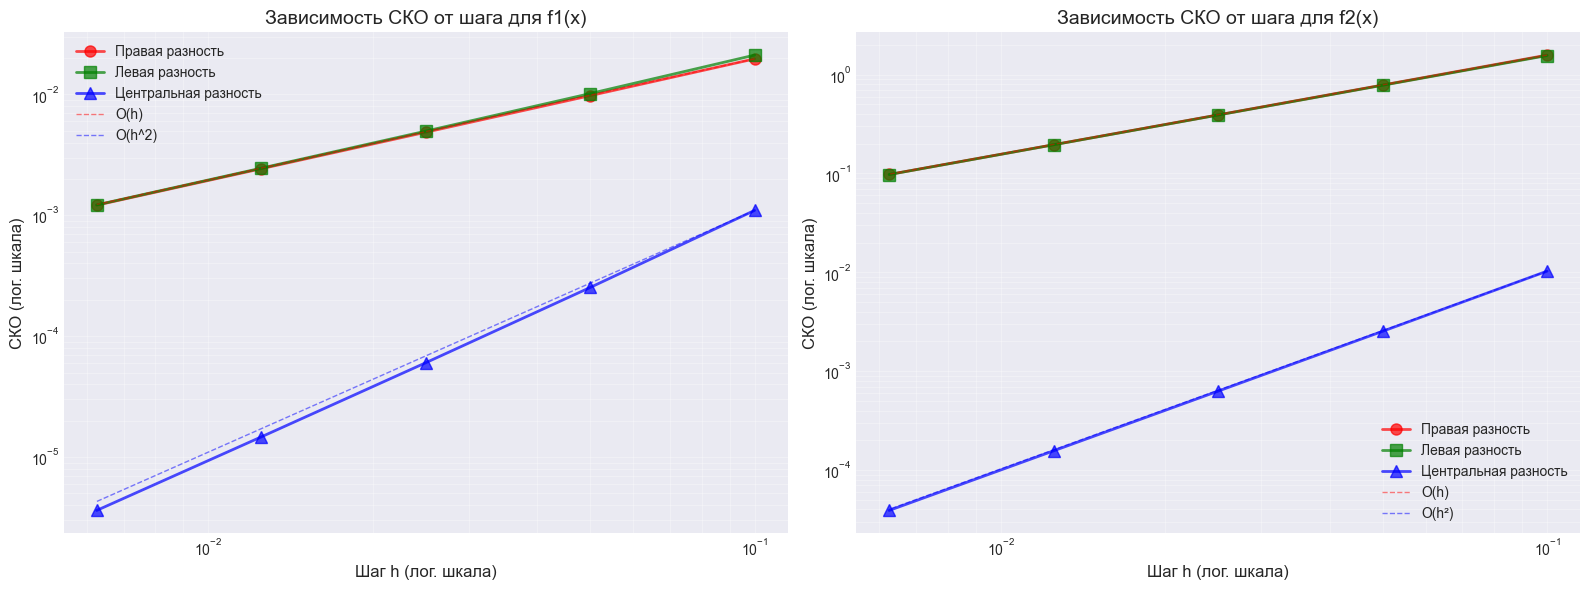

In [810]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax1 = axes[0]
ax1.loglog(results_f1['h'], results_f1['right'], 'ro-', linewidth=2, markersize=8,
          label='Правая разность', alpha=0.7)
ax1.loglog(results_f1['h'], results_f1['left'], 'gs-', linewidth=2, markersize=8,
          label='Левая разность', alpha=0.7)
ax1.loglog(results_f1['h'], results_f1['central'], 'b^-', linewidth=2, markersize=8,
          label='Центральная разность', alpha=0.7)
h_ref = np.array(results_f1['h'])
ax1.loglog(h_ref, h_ref * results_f1['right'][0] / h_ref[0], 'r--',
          linewidth=1, alpha=0.5, label='O(h)')
ax1.loglog(h_ref, h_ref**2 * results_f1['central'][0] / h_ref[0]**2, 'b--',
          linewidth=1, alpha=0.5, label='O(h^2)')
ax1.set_xlabel('Шаг h (лог. шкала)', fontsize=12)
ax1.set_ylabel('СКО (лог. шкала)', fontsize=12)
ax1.set_title('Зависимость СКО от шага для f1(x)', fontsize=14)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, which='both')
ax2 = axes[1]
ax2.loglog(results_f2['h'], results_f2['right'], 'ro-', linewidth=2, markersize=8,
          label='Правая разность', alpha=0.7)
ax2.loglog(results_f2['h'], results_f2['left'], 'gs-', linewidth=2, markersize=8,
          label='Левая разность', alpha=0.7)
ax2.loglog(results_f2['h'], results_f2['central'], 'b^-', linewidth=2, markersize=8,
          label='Центральная разность', alpha=0.7)
h_ref2 = np.array(results_f2['h'])
ax2.loglog(h_ref2, h_ref2 * results_f2['right'][0] / h_ref2[0], 'r--',
          linewidth=1, alpha=0.5, label='O(h)')
ax2.loglog(h_ref2, h_ref2**2 * results_f2['central'][0] / h_ref2[0]**2, 'b--',
          linewidth=1, alpha=0.5, label='O(h²)')
ax2.set_xlabel('Шаг h (лог. шкала)', fontsize=12)
ax2.set_ylabel('СКО (лог. шкала)', fontsize=12)
ax2.set_title('Зависимость СКО от шага для f2(x)', fontsize=14)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()


### 6. Анализ порядка точности методов

In [811]:
def estimate_order(h_values, mse_values):
    log_h = np.log(h_values)
    log_mse = np.log(mse_values)
    coeffs = np.polyfit(log_h, log_mse, 1)
    order = coeffs[0]
    return order
order_f1_right = estimate_order(results_f1['h'], results_f1['right'])
order_f1_left = estimate_order(results_f1['h'], results_f1['left'])
order_f1_central = estimate_order(results_f1['h'], results_f1['central'])
order_f2_right = estimate_order(results_f2['h'], results_f2['right'])
order_f2_left = estimate_order(results_f2['h'], results_f2['left'])
order_f2_central = estimate_order(results_f2['h'], results_f2['central'])
print(f"Метод | f1(x) | f2(x)")
print()
print(f"Правая разность | {order_f1_right:^15.3f} | {order_f2_right:^15.3f}")
print(f"Левая разность | {order_f1_left:^15.3f} | {order_f2_left:^15.3f}")
print(f"Центральная разность | {order_f1_central:^15.3f} | {order_f2_central:^15.3f}")
print()
print("Теоретические значения:")
print("Правая/Левая разность: O(h)   => порядок = 1.0")
print("Центральная разность:  O(h^2)  => порядок = 2.0")


Метод | f1(x) | f2(x)

Правая разность |      1.005      |      1.003     
Левая разность |      1.028      |      0.999     
Центральная разность |      2.060      |      2.009     

Теоретические значения:
Правая/Левая разность: O(h)   => порядок = 1.0
Центральная разность:  O(h^2)  => порядок = 2.0


### Выводы по Заданию 2

**Основные результаты:**

1. **Точность методов:**
   - Центральная разностная схема показывает наилучшую точность среди всех методов
   - СКО для центральной схемы значительно меньше чем для односторонних схем
   - Правая и левая разностные схемы дают схожие результаты

2. **Зависимость от шага:**
   - При уменьшении шага в 2, 4, 8, 16 раз СКО закономерно уменьшается
   - Для односторонних разностей (правая/левая) СКО уменьшается пропорционально h (порядок O(h))
   - Для центральной разности СКО уменьшается пропорционально h^2 (порядок O(h^2))

3. **Порядок точности:**
     * Односторонние схемы: p = 1.0 (первый порядок)
     * Центральная схема: p = 2.0 (второй порядок)

---
# Вывод

## Задание 1: Метод дихотомии
- Исследована унимодальная функция на различных интервалах
- Реализован метод дихотомии для поиска минимума
- Подтверждена теоретическая оценка числа итераций
- Визуализирован процесс сходимости метода

## Задание 2: Численное дифференцирование
- Реализованы методы численного дифференцирования различных порядков точности
- Проведено сравнение численных производных с аналитическими
- Исследована зависимость погрешности от величины шага сетки
- Подтверждены теоретические порядки точности методов